Descripción del dataset:

Contexto y origen del conjunto de datos:
Este conjunto de datos contiene información sobre coches eléctricos, incluyendo precios, características de los vehículos como velocidad máxima, alcance y tipo de tracción.

Primeras filas del dataset:
                        Name  \
0  Lucid Air Dream Edition P   
1     Porsche Taycan Turbo S   
2          Audi e-tron GT RS   
3      Renault Zoe ZE50 R110   
4          Audi Q4 e-tron 35   

                                            Subtitle  Acceleration  TopSpeed  \
0  118 kWh useable battery          Available sin...           2.7       270   
1  83.7 kWh useable battery          Available si...           2.8       260   
2  85 kWh useable battery          Available sinc...           3.3       250   
3  52 kWh useable battery          Available sinc...          11.4       135   
4  52 kWh useable battery          Available sinc...           9.0       160   

   Range  Efficiency  FastChargeSpeed              Drive 

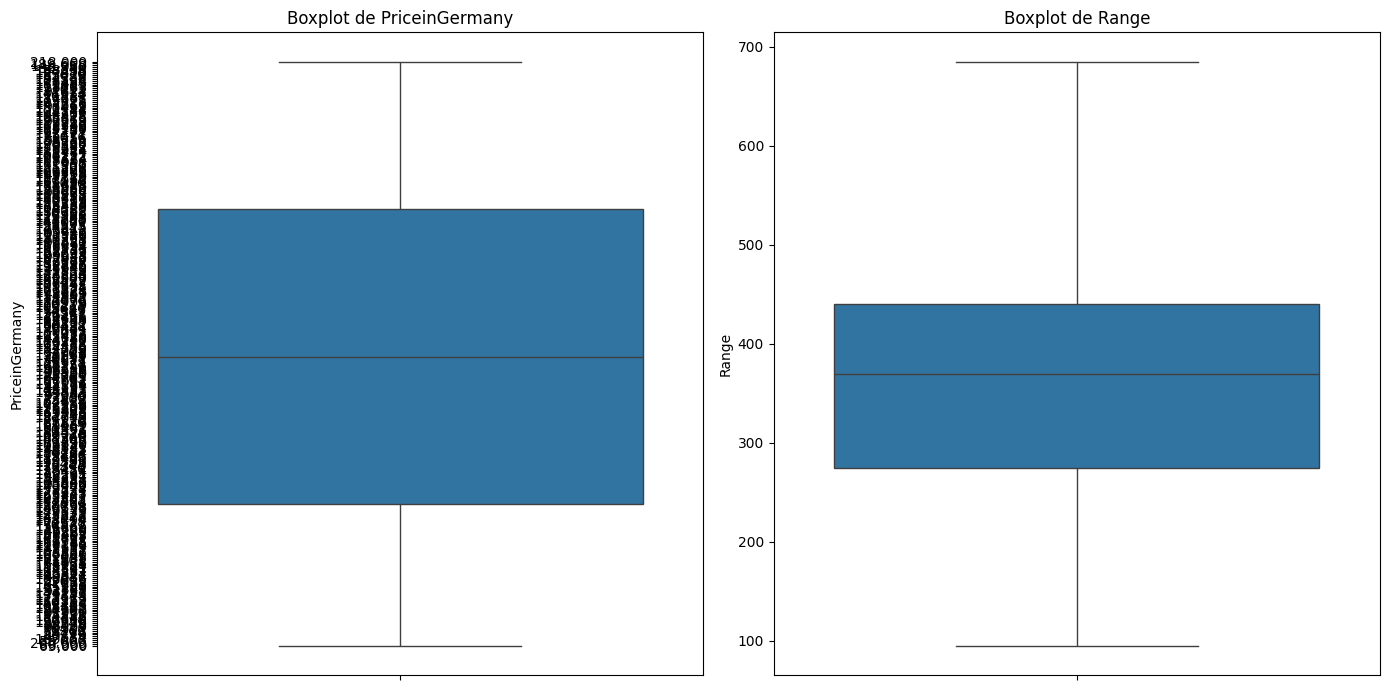

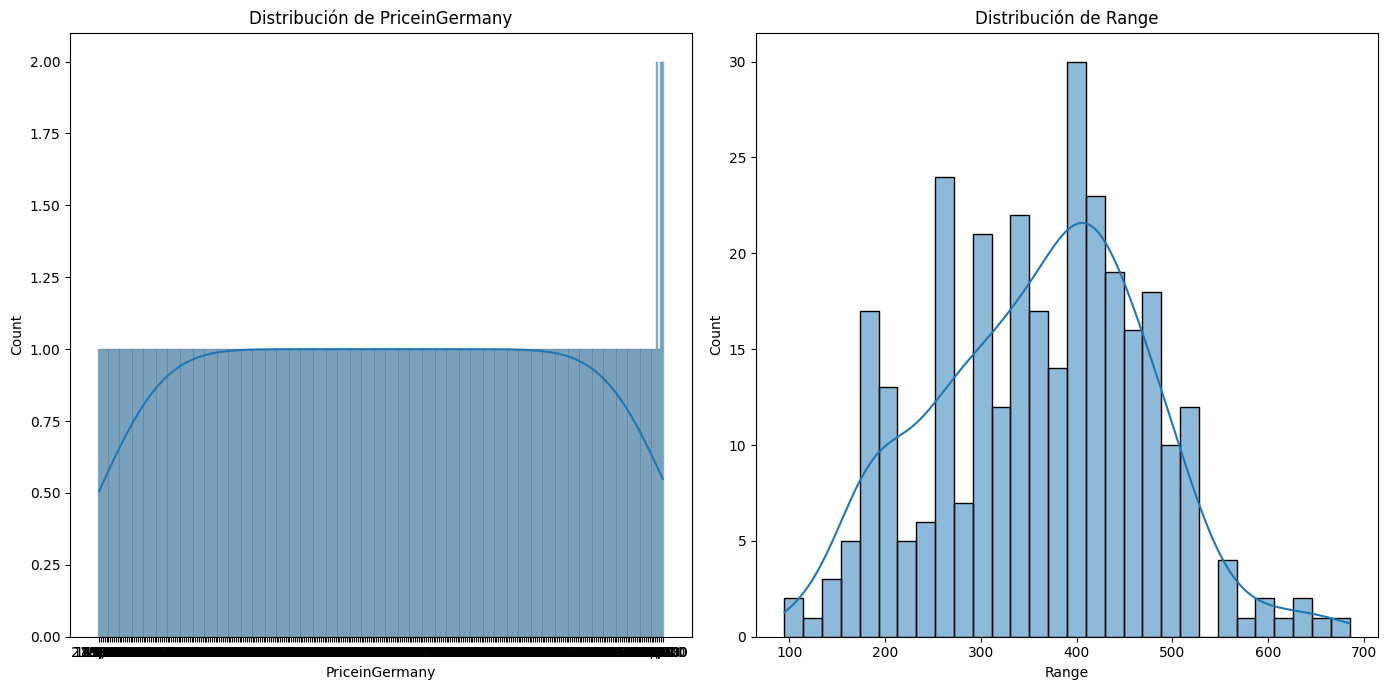

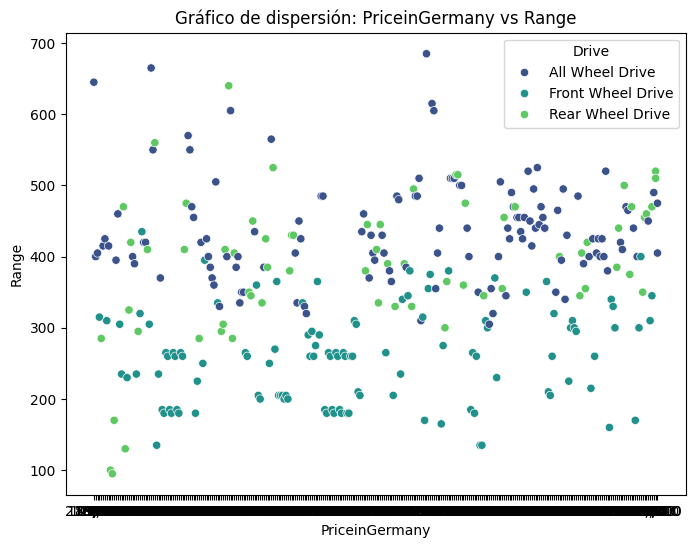

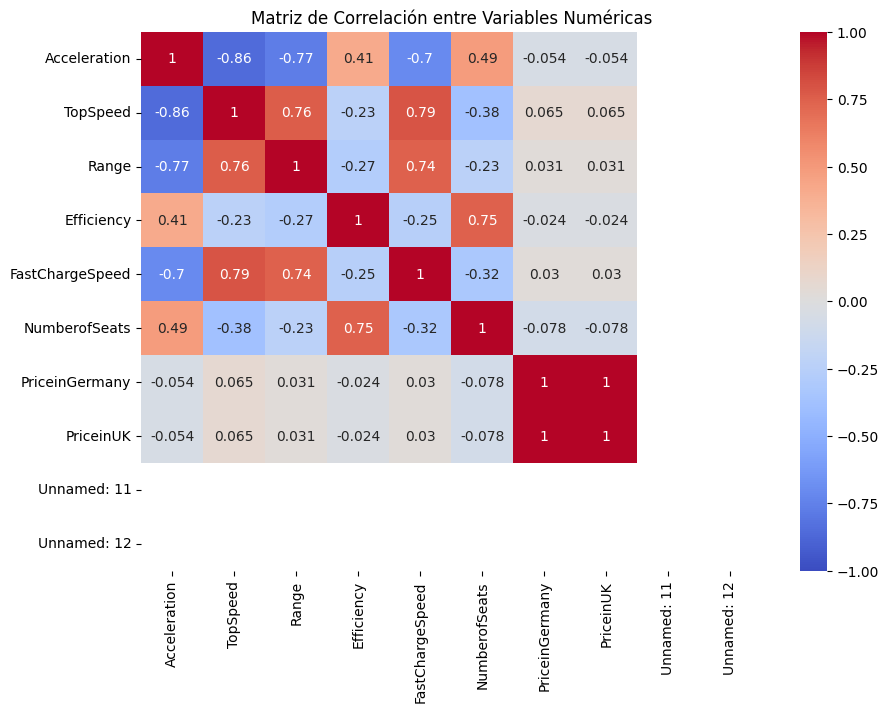

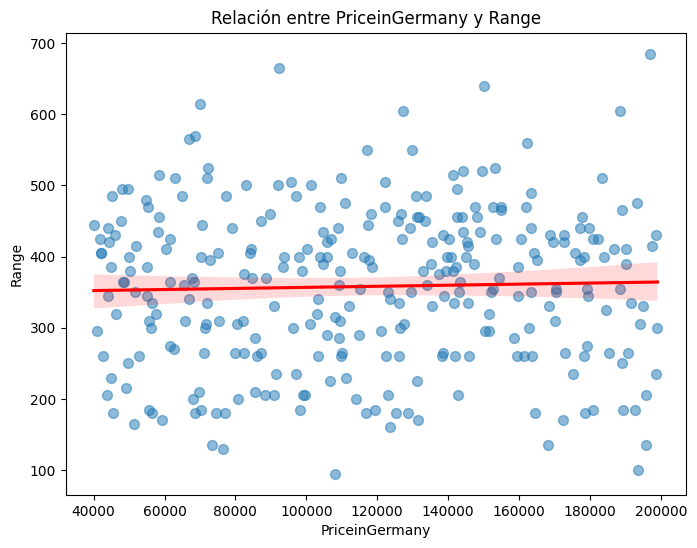


Correlación entre TopSpeed y Range:
          TopSpeed    Range
TopSpeed   1.00000  0.76356
Range      0.76356  1.00000

Conclusiones del Análisis Exploratorio de Datos:
1. Los datos parecen estar en su mayoría completos, pero debemos verificar si existen valores faltantes.
2. El análisis descriptivo muestra las medidas centrales y de dispersión de las variables clave como PriceinGermany, TopSpeed y Range.
3. Los boxplots indican la presencia de posibles outliers, especialmente en 'PriceinGermany' y 'Range'.
4. Las distribuciones muestran que 'PriceinGermany' tiene una distribución sesgada hacia valores más bajos, mientras que 'Range' parece estar más distribuido.
5. Las relaciones entre 'PriceinGermany' y otras variables como 'Range' y 'TopSpeed' muestran algunas tendencias interesantes que justifican su inclusión en el modelo de optimización.


In [ ]:
#ANALISIS EXPLORATORIO

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos del archivo CSV
data = pd.read_csv("Cheapestelectriccars-EVDatabase 2023.csv")

# 1. Descripción del dataset
print("Descripción del dataset:")
print("\nContexto y origen del conjunto de datos:")
print("Este conjunto de datos contiene información sobre coches eléctricos, incluyendo precios, características de los vehículos como velocidad máxima, alcance y tipo de tracción.\n")
print("Primeras filas del dataset:")
print(data.head())  # Mostrar las primeras filas del dataset

# Descripción de las variables (tipos de datos, dimensiones, etc.)
print("\nDescripción general de las variables:")
print(data.info())  # Información sobre el dataset (tipos de datos, cantidad de valores no nulos, etc.)

# 2. Estadística descriptiva
print("\nEstadísticas descriptivas del dataset:")
print(data.describe())  # Estadísticas descriptivas para variables numéricas

# 3. Detección de valores faltantes y outliers

# 3.1 Detección de valores faltantes
print("\nDetección de valores faltantes:")
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])  # Mostrar columnas con valores faltantes

# Opcional: Si deseas eliminar filas con valores faltantes en columnas clave
# data = data.dropna(subset=["PriceinGermany", "TopSpeed", "Range"])

# 3.2 Detección de outliers usando boxplots (Ejemplo con precio y alcance)
plt.figure(figsize=(14, 7))

# Boxplot de "PriceinGermany"
plt.subplot(1, 2, 1)
sns.boxplot(data['PriceinGermany'])
plt.title("Boxplot de PriceinGermany")

# Boxplot de "Range"
plt.subplot(1, 2, 2)
sns.boxplot(data['Range'])
plt.title("Boxplot de Range")

plt.tight_layout()
plt.show()

# 4. Visualizaciones básicas

# 4.1 Distribución de variables numéricas
plt.figure(figsize=(14, 7))

# Histograma de "PriceinGermany"
plt.subplot(1, 2, 1)
sns.histplot(data['PriceinGermany'], bins=30, kde=True)
plt.title("Distribución de PriceinGermany")

# Histograma de "Range"
plt.subplot(1, 2, 2)
sns.histplot(data['Range'], bins=30, kde=True)
plt.title("Distribución de Range")

plt.tight_layout()
plt.show()

# 4.2 Gráfico de dispersión entre "PriceinGermany" y "Range"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PriceinGermany', y='Range', hue='Drive', palette='viridis')
plt.title("Gráfico de dispersión: PriceinGermany vs Range")
plt.xlabel("PriceinGermany")
plt.ylabel("Range")
plt.show()

# 5. Identificación de posibles relaciones

# 5.1 Asegurarse de que las columnas 'PriceinGermany' y 'Range' sean numéricas
data['PriceinGermany'] = pd.to_numeric(data['PriceinGermany'], errors='coerce')
data['Range'] = pd.to_numeric(data['Range'], errors='coerce')

# 5.2 Eliminar filas con valores NaN en 'PriceinGermany' o 'Range' después de la conversión
data_cleaned = data.dropna(subset=['PriceinGermany', 'Range'])

# 5.3 Matriz de correlación entre variables numéricas
numeric_data = data_cleaned.select_dtypes(include=[np.number])  # Filtrar solo columnas numéricas
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# 5.4 Relación entre 'PriceinGermany' y 'Range' usando un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.regplot(x='PriceinGermany', y='Range', data=data_cleaned, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Relación entre PriceinGermany y Range")
plt.xlabel("PriceinGermany")
plt.ylabel("Range")
plt.show()

# 6. Identificación de posibles relaciones

# 6.1 Análisis de correlación adicional (por ejemplo, con 'TopSpeed' y 'Range')
print("\nCorrelación entre TopSpeed y Range:")
print(data_cleaned[['TopSpeed', 'Range']].corr())

# Resumen de las conclusiones
print("\nConclusiones del Análisis Exploratorio de Datos:")
print("1. Los datos parecen estar en su mayoría completos, pero debemos verificar si existen valores faltantes.")
print("2. El análisis descriptivo muestra las medidas centrales y de dispersión de las variables clave como PriceinGermany, TopSpeed y Range.")
print("3. Los boxplots indican la presencia de posibles outliers, especialmente en 'PriceinGermany' y 'Range'.")
print("4. Las distribuciones muestran que 'PriceinGermany' tiene una distribución sesgada hacia valores más bajos, mientras que 'Range' parece estar más distribuido.")
print("5. Las relaciones entre 'PriceinGermany' y otras variables como 'Range' y 'TopSpeed' muestran algunas tendencias interesantes que justifican su inclusión en el modelo de optimización.")

